In [1]:
%matplotlib notebook

import numpy as np
import time
import matplotlib.pyplot as plt
import alakol_datalogger

# Alakol Datalogger

---

In [2]:
class LivePlotter:
    def __init__(self, x_vec, y1_data, title='', pause_time=0.1):

        self.fig = plt.figure(figsize=(8,5))
        self.ax = self.fig.add_subplot(111)
        
        # Create a variable for the line so we can later update it
        self.line1, = self.ax.plot(x_vec, y1_data, '-o', alpha=0.8)        
        
        # Set the plot label/title
        plt.ylabel('Pressure  (kPa)')
        plt.xlabel('Time  (s)')
        plt.title(title)
        plt.grid()
        plt.show()
        
    def draw(self, y_data):
        # After the figure, axis, and line are created, we only need to update the y-data
        self.line1.set_ydata(y_data)
    
        # If data goes beyond bounds, or only occupies a small section of the y-axis
        [ylim_top, ylim_bottom] = self.line1.axes.get_ylim()
        if np.min(y_data) <= ylim_top or np.max(y_data) >= ylim_bottom or \
            np.std(y_data)*8 < abs(ylim_top - ylim_bottom):
            # Adjust limits
            plt.ylim([np.min(y_data) - np.std(y_data), np.max(y_data) + np.std(y_data)])
        
        # Redraw
        self.fig.canvas.draw()

<IPython.core.display.Javascript object>


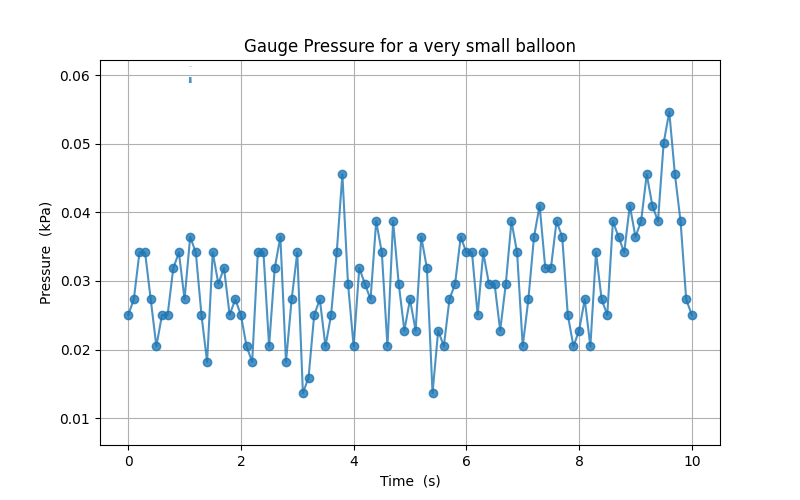

In [ ]:
# Connect
streaming = alakol_datalogger.AlakolSocket()
streaming.connect("192.168.1.77", 8080)

# Setup plot
size = 100
rate = 10 # Hertz
x_vec = np.linspace(0, size/rate, size+1)
y_vec = np.zeros(len(x_vec))
plotter = LivePlotter(x_vec, y_vec, "Gauge Pressure for a very small balloon")

for data in streaming.cbor_receive():
    try:
        value = data['gauge_pressure']
    
        y_vec[-1] = value
        plotter.draw(y_vec)
        y_vec = np.append(y_vec[1:],0.0)
    except:
        print("Bad data")
        None